# BIKE SHARING DEMAND

### Import Required Libraries

In [2]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')


# data visualisation and manipulation
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from datetime import datetime
import calendar


#label Encoding on Train and Test 
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
from sklearn.preprocessing import LabelEncoder


#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import GridSearchCV

#import the necessary modelling algos
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
#from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor


#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error

### Loading the Train Data and Test Data

In [3]:
Train_data = pd.read_csv('train.csv')
Test_data = pd.read_csv('test.csv')

### A Short description of the Features



* datetime - hourly date + timestamp

* season - 1 = spring, 2 = summer, 3 = fall, 4 = winter

* holiday - whether the day is considered a holiday

* workingday - whether the day is neither a weekend nor holiday

* weather -

         1: Clear, Few clouds, Partly cloudy, Partly cloudy
         2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
         3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
         4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

* temp - temperature in Celsius

* atemp - "feels like" temperature in Celsius

* humidity - relative humidity

* windspeed - wind speed

* casual - number of non-registered user rentals initiated

* registered - number of registered user rentals initiated

* count - number of total rentals

### Data Inspection

In [4]:
Train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
Test_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [6]:
# Shape of the dataset
print('Shape of the Train data:',Train_data.shape)
print('Shape of the Test data:',Test_data.shape)

Shape of the Train data: (10886, 12)
Shape of the Test data: (6493, 9)


* **The Train data contains 10886 rows and 12 columns including the target column.**
* **The Test data contains 6493 rows and 9 columns.**

In [7]:
# Checking the data types of each column of this dataset.
print('Data type of Train data :\n', Train_data.dtypes,'\n\n')
print('Data type of Test data :\n', Test_data.dtypes)

Data type of Train data :
 datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object 


Data type of Test data :
 datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
dtype: object


In [8]:
# Checking the columns of both the data.
print('Columns of Train data :\n' , Train_data.columns,'\n\n\n')
print('Columns of Test data :\n', Test_data.columns)

Columns of Train data :
 Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object') 



Columns of Test data :
 Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')


**Test data does not include the target variable. i.e. 'casual', 'registered' and 'count' Column**

In [9]:
# Information of both the data
print( Train_data.info(),'\n\n')
print( Test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
None 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season    

In [10]:
# Describe both data
Train_data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [11]:
Test_data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
std,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600


### Feature Selection & Extraction

**Now most importantly split the date and time as the time of day is expected to effect the no of bikes. for example at office hours like early mornning or evening one would expect a greater demand of rental bikes. Datetime column is in object data type. Thus, extracting date, month, weekday and hour in both Train and Test data from datetime.**

In [12]:
Train_data["date"] = Train_data.datetime.apply(lambda x : x.split()[0])
Train_data["day"] = Train_data.datetime.apply(lambda x : x.split()[0].split("-")[2])
Train_data["hour"] = Train_data.datetime.apply(lambda x : x.split()[1].split(":")[0])
Train_data["year"] = Train_data.datetime.apply(lambda x : x.split()[0].split("-")[0])
Train_data["weekday"] = Train_data.date.apply(lambda x : calendar.day_name[datetime.strptime(x,"%Y-%m-%d").weekday()])
Train_data["month"] = Train_data.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%Y-%m-%d").month])

In [13]:
Train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,day,hour,year,weekday,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,01,00,2011,Saturday,January
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,01,01,2011,Saturday,January
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,01,02,2011,Saturday,January
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,01,03,2011,Saturday,January
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,01,04,2011,Saturday,January


In [14]:
Test_data["date"] = Test_data.datetime.apply(lambda x : x.split()[0])
Test_data["day"] =Test_data.datetime.apply(lambda x : x.split()[0].split("-")[2])
Test_data["hour"] = Test_data.datetime.apply(lambda x : x.split()[1].split(":")[0])
Test_data["year"] = Test_data.datetime.apply(lambda x : x.split()[0].split("-")[0])
Test_data["weekday"] = Test_data.date.apply(lambda x : calendar.day_name[datetime.strptime(x,"%Y-%m-%d").weekday()])
Test_data["month"] = Test_data.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%Y-%m-%d").month])

In [15]:
Test_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,date,day,hour,year,weekday,month
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011-01-20,20,00,2011,Thursday,January
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011-01-20,20,01,2011,Thursday,January
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011-01-20,20,02,2011,Thursday,January
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011-01-20,20,03,2011,Thursday,January
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011-01-20,20,04,2011,Thursday,January


In [16]:
# Number of unique values in each columns and unique values in each columns.

for i in Train_data.columns:
    print("Unique value of = {} [[{}]]\n{}\n".format(i, len(Train_data[i].unique()), Train_data[i].unique()))

Unique value of = datetime [[10886]]
['2011-01-01 00:00:00' '2011-01-01 01:00:00' '2011-01-01 02:00:00' ...
 '2012-12-19 21:00:00' '2012-12-19 22:00:00' '2012-12-19 23:00:00']

Unique value of = season [[4]]
[1 2 3 4]

Unique value of = holiday [[2]]
[0 1]

Unique value of = workingday [[2]]
[0 1]

Unique value of = weather [[4]]
[1 2 3 4]

Unique value of = temp [[49]]
[ 9.84  9.02  8.2  13.12 15.58 14.76 17.22 18.86 18.04 16.4  13.94 12.3
 10.66  6.56  5.74  7.38  4.92 11.48  4.1   3.28  2.46 21.32 22.96 23.78
 24.6  19.68 22.14 20.5  27.06 26.24 25.42 27.88 28.7  30.34 31.16 29.52
 33.62 35.26 36.9  32.8  31.98 34.44 36.08 37.72 38.54  1.64  0.82 39.36
 41.  ]

Unique value of = atemp [[60]]
[14.395 13.635 12.88  17.425 19.695 16.665 21.21  22.725 21.97  20.455
 11.365 10.605  9.85   8.335  6.82   5.305  6.06   9.09  12.12   7.575
 15.91   3.03   3.79   4.545 15.15  18.18  25.    26.515 27.275 29.545
 23.485 25.76  31.06  30.305 24.24  18.94  31.82  32.575 33.335 28.79
 34.85  35.60

### Data Visualization

**Correlation Matrix allows to have a global view of the more or less strong relationship between several variables LINEARLY.**

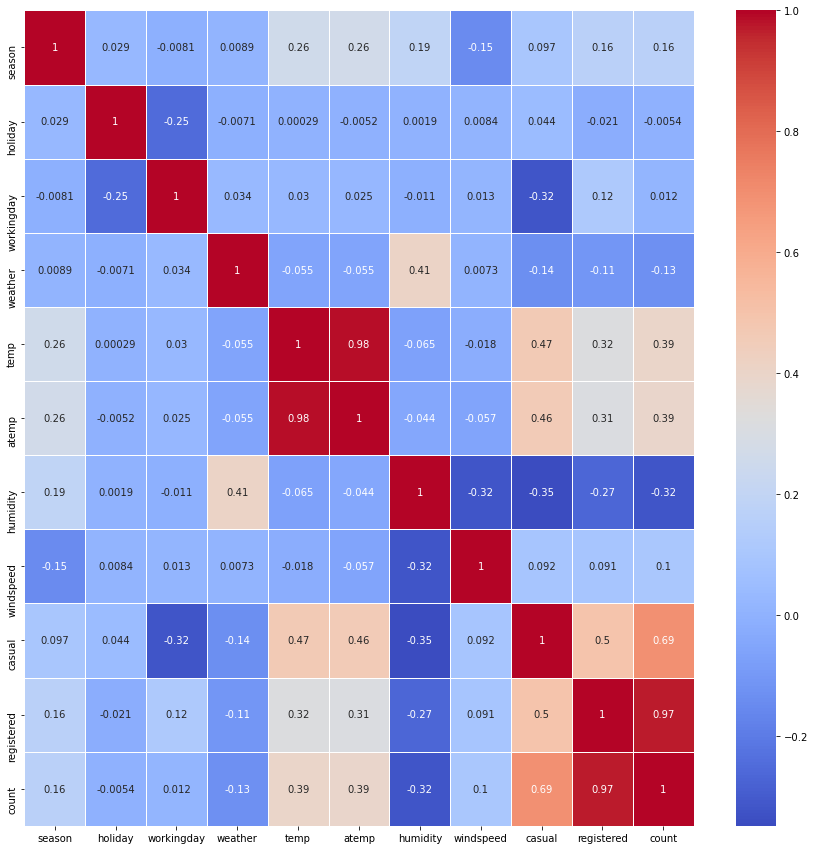

In [17]:
plt.figure(figsize=(15,15))    
ax = sns.heatmap(Train_data.corr(), cmap = "coolwarm", annot=True, linewidth=1)
bottom, top = ax.get_ylim()

**INFERENCES FROM THE ABOVE HEATMAP --**

* self realtion i.e. of a feature to itself is equal to 1 as expected.

* temp and atemp are highly related as expected.

* humidity is negatively correlated to count as expected as the weather is humid people will not like to travel on a bike.

* Also note that temp(or atemp) effects the count.

* registered/casual and count are highly related which indicates that most of the bikes that are rented are registered.

* similarly we can draw some more inferences like weather and humidity and so on... 

12    456
13    456
22    456
21    456
20    456
19    456
18    456
17    456
16    456
15    456
14    456
23    456
11    455
10    455
09    455
08    455
07    455
06    455
00    455
01    454
05    452
02    448
04    442
03    433
Name: hour, dtype: int64


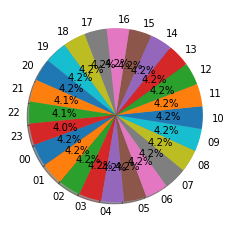

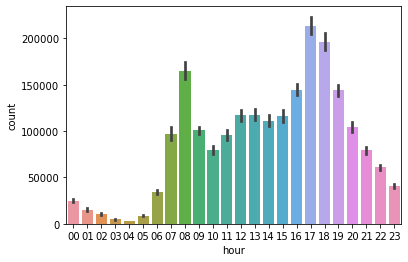

In [18]:
print(Train_data.hour.value_counts())
values=Train_data['hour'].value_counts().values
label=['00', '01', '02', '03', '04', '05','06', '07', '08', '09', '10', '11','12','13','14', '15','16','17','18','19', '20', '21', '22', '23']
fig,ax1=plt.subplots()
ax1.pie(values,labels=label,shadow=True,startangle=200,autopct='%1.1f%%')
plt.show()

sns.barplot(x='hour',y='count',data=Train_data,estimator = np.sum)
label=['00', '01', '02', '03', '04', '05','06', '07', '08', '09', '10', '11','12','13','14', '15','16','17','18','19', '20', '21', '22', '23']
plt.show()

**Note that the highest demand is in hours from say 7-10 and the from 15-19. This is because in most of the cities this is the peak office time and so more people would be renting bikes. This is just one of the plausible reason.**

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64


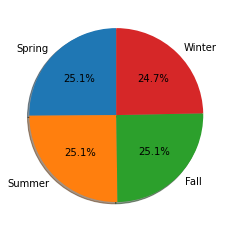

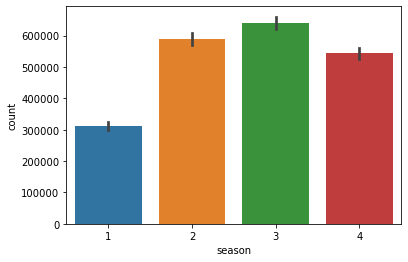

In [19]:
print(Train_data.season.value_counts())
values=Train_data['season'].value_counts().values
label=[ "Spring", "Summer", "Fall", "Winter"]
fig,ax1=plt.subplots()
ax1.pie(values,labels=label,shadow=True,startangle=90,autopct='%1.1f%%')
plt.show()

sns.barplot(x='season',y='count',data=Train_data,estimator = np.sum)
label=[ "Spring", "Summer", "Fall", "Winter"]
plt.show()

* **There are 4 type of season { "Spring", "Summer", "Fall", "Winter"}.**
* **Season 'Spring' has lowest demand of bike out of all the 4 types of Season.**

0    10575
1      311
Name: holiday, dtype: int64


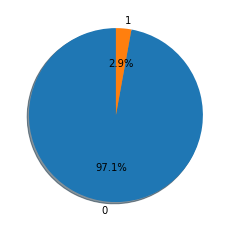

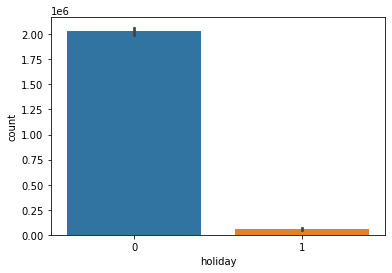

In [20]:
print(Train_data.holiday.value_counts())
values=Train_data['holiday'].value_counts().values
label=[0,1]
fig,ax1=plt.subplots()
ax1.pie(values,labels=label,shadow=True,startangle=90,autopct='%1.1f%%')
plt.show()

sns.barplot(x='holiday',y='count',data=Train_data, estimator = np.sum)
label=[0,1]
plt.show()

**Majority of data is for non holiday days.**

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64


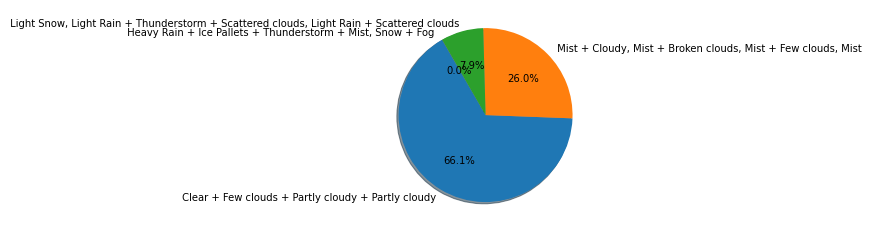

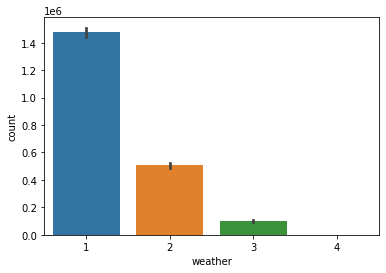

In [21]:
print(Train_data.weather.value_counts())
values=Train_data['weather'].value_counts().values
label=[" Clear + Few clouds + Partly cloudy + Partly cloudy", " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ",  " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds", " Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog "]
fig,ax1=plt.subplots()
ax1.pie(values,labels=label,shadow=True,startangle=120,autopct='%1.1f%%')
plt.show()

sns.barplot(x='weather',y='count',data=Train_data,estimator = np.sum)
label=[" Clear + Few clouds + Partly cloudy + Partly cloudy", 
       " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ",
       " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds",
       " Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog "]

plt.show()

* **There are 4 type of weather.**
* **Weather 'Clear + Few clouds + Partly cloudy + Partly cloudy' has highest demand of bike out of all the 4 types of weather.**
* **Weather " Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog" has lowest demand of bike out of all the 4 types of weather.**

Saturday     1584
Sunday       1579
Thursday     1553
Monday       1551
Wednesday    1551
Tuesday      1539
Friday       1529
Name: weekday, dtype: int64


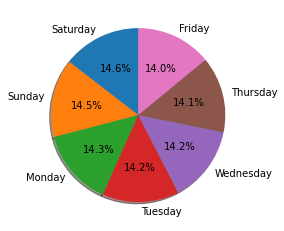

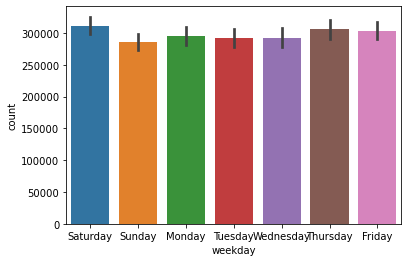

In [22]:
print(Train_data.weekday.value_counts())
values=Train_data['weekday'].value_counts().values
label=['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
fig,ax1=plt.subplots()
ax1.pie(values,labels=label,shadow=True,startangle=90,autopct='%1.1f%%')
plt.show()

sns.barplot(x='weekday',y='count',data=Train_data, estimator = np.sum)
label=['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
plt.show()

May          912
June         912
July         912
August       912
December     912
October      911
November     911
April        909
September    909
February     901
March        901
January      884
Name: month, dtype: int64


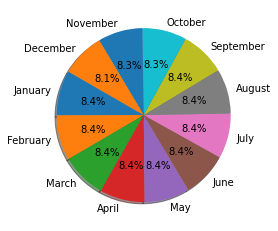

In [23]:
print(Train_data.month.value_counts())
values=Train_data['month'].value_counts().values
label=['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']
fig,ax1=plt.subplots()
ax1.pie(values,labels=label,shadow=True,startangle=150,autopct='%1.1f%%')
plt.show()

### Reduction of Dimension

*  **'Datetime' : Drop 'Datetime' column from both the data because the datetime is exracted in different columns.**
 
*  **casual and registered : 'count' is highly positive correlated to 'casual' and 'registered'. So Drop both the columns from train data.**
 
*  **date : Drop 'date' column from both the data because the date is exracted into day, month and year.** 

In [24]:
Train_data  = Train_data.drop(["datetime", 'casual', 'registered','date' ],axis=1)

In [25]:
Train_data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,day,hour,year,weekday,month
0,1,0,0,1,9.84,14.395,81,0.0,16,01,00,2011,Saturday,January
1,1,0,0,1,9.02,13.635,80,0.0,40,01,01,2011,Saturday,January
2,1,0,0,1,9.02,13.635,80,0.0,32,01,02,2011,Saturday,January
3,1,0,0,1,9.84,14.395,75,0.0,13,01,03,2011,Saturday,January
4,1,0,0,1,9.84,14.395,75,0.0,1,01,04,2011,Saturday,January


In [26]:
Test_data  = Test_data.drop(['date'],axis=1)

In [27]:
Test_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,day,hour,year,weekday,month
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,20,00,2011,Thursday,January
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,20,01,2011,Thursday,January
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,20,02,2011,Thursday,January
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,20,03,2011,Thursday,January
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,20,04,2011,Thursday,January


### Missing Value Analysis

**Checking Missing values in Train and Test data set.**

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
count         0
day           0
hour          0
year          0
weekday       0
month         0
dtype: int64


<AxesSubplot:>

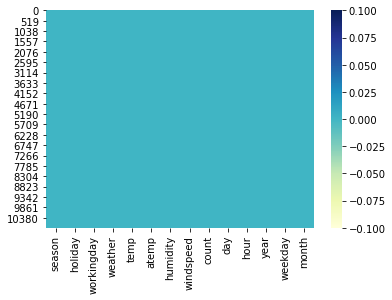

In [28]:
# Train data set
print(Train_data.isnull().sum())

# Visualizing the same using heatmap.
sns.heatmap(Train_data.isnull(), cmap = 'YlGnBu')

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
day           0
hour          0
year          0
weekday       0
month         0
dtype: int64


<AxesSubplot:>

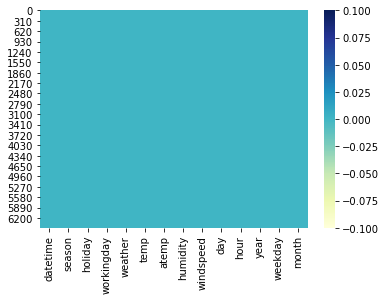

In [29]:
# Test data set
print(Test_data.isnull().sum())

# Visualizing the same using heatmap.
sns.heatmap(Test_data.isnull(), cmap = 'YlGnBu')

* **There are no null values present in both the dataset i.e. Train and Test data.**

### Outlier Analysis

**Checking outliers using box plot**

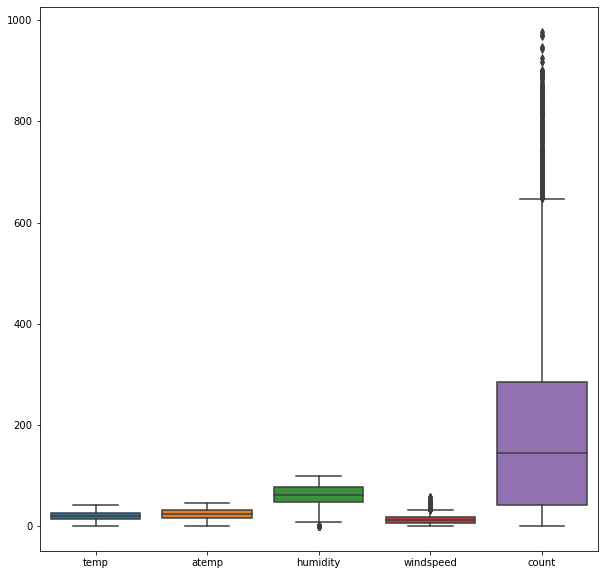

In [30]:
sns.boxplot(data=Train_data[['temp','atemp', 'humidity', 'windspeed', 'count']])
fig=plt.gcf()
fig.set_size_inches(10,10)

**Removing outliers in each of the attributes**

In [31]:
cnames = ['temp','atemp', 'humidity', 'windspeed', 'count']
for i in cnames:
    print(i)
    q75, q25 = np.percentile( Train_data.loc[:,i],[75,25])
    iqr = q75-q25
    min = q25-(iqr*1.5)
    max = q75+(iqr*1.5)
    print(min)
    print(max)
   
    Train_data = Train_data.drop( Train_data[ Train_data.loc[:,i] < min].index)
    Train_data = Train_data.drop( Train_data[ Train_data.loc[:,i] > max].index)

temp
-4.51
44.69
atemp
-4.927500000000002
52.6525
humidity
2.0
122.0
windspeed
-7.993100000000002
31.992500000000003
count
-322.5
649.5


In [32]:
Train_data.shape

(10352, 14)

**Use lable encoder to transform data**

In [33]:
#Train data
Train_data['weekday']=label_encoder.fit_transform(Train_data['weekday'])
Train_data['month']=label_encoder.fit_transform(Train_data['month'])
Train_data['year']=label_encoder.fit_transform(Train_data['year'])

In [34]:
#Test data
Test_data['weekday']=label_encoder.fit_transform(Test_data['weekday'])
Test_data['year']=label_encoder.fit_transform(Test_data['year'])
Test_data['month']=label_encoder.fit_transform(Test_data['month'])

### Converting data type

In [35]:
object_Variable_List = ["hour",'day']
for i in object_Variable_List:
    Train_data[i] = Train_data[i].astype("int64")
    Test_data[i] = Test_data[i].astype("int64")

In [36]:
Train_data.dtypes

season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
count           int64
day             int64
hour            int64
year            int32
weekday         int32
month           int32
dtype: object

In [37]:
Test_data.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
day             int64
hour            int64
year            int32
weekday         int32
month           int32
dtype: object

### Saperating The Input and Output Variables

In [38]:
# Splitting the data into Independent and Dependent variables.

X = Train_data.drop('count', axis=1)
Y = Train_data['count']

In [39]:
# Let's check the Shape of Input and Output variables.

print(X.shape)
print(Y.shape)

(10352, 13)
(10352,)


In [40]:
# Checking the Independent variables.

X.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,day,hour,year,weekday,month
0,1,0,0,1,9.84,14.395,81,0.0,1,0,0,2,4
1,1,0,0,1,9.02,13.635,80,0.0,1,1,0,2,4
2,1,0,0,1,9.02,13.635,80,0.0,1,2,0,2,4
3,1,0,0,1,9.84,14.395,75,0.0,1,3,0,2,4
4,1,0,0,1,9.84,14.395,75,0.0,1,4,0,2,4


In [41]:
# Checking the Dependent variable.

Y.head()

0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

### Splitting the Train data

**Splitting the Train data into train and test set, ratio being 75% and 25% respectively.**

In [42]:
# Importing library for split Train data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.25)

**HERE ALL THE VARIABLES OR FEATURES ARE NUMERIC AND THE TARGET VARIABLE THAT WE HAVE TO PREDICT IS THE count VARIABLE. HENCE THIS IS A TYPICAL EXAMPLE OF A REGRESSION PROBLEM AS THE count VARIABLE IS CONTINUOUS VARIED.**

### Model Building

In [43]:
models=[RandomForestRegressor(),AdaBoostRegressor(),BaggingRegressor(),
        KNeighborsRegressor()]
model_names=['RandomForestRegressor','AdaBoostRegressor','BaggingRegressor',
             'KNeighborsRegressor']
r2score=[]
d={}
for model in range (len(models)):
    clf=models[model]
    clf.fit(X_train,Y_train)
    test_pred=clf.predict(X_test)
    r2score.append(np.sqrt(r2_score(test_pred,Y_test)))
d={'Modelling Algo':model_names,'R2_error':r2score}   

In [44]:
d

{'Modelling Algo': ['RandomForestRegressor',
  'AdaBoostRegressor',
  'BaggingRegressor',
  'KNeighborsRegressor'],
 'R2_error': [0.9590590243855545,
  0.6739147127471509,
  0.9547214375189823,
  0.4724880119744675]}

In [45]:
rmsle_frame=pd.DataFrame(d)
rmsle_frame

,Modelling Algo,R2_error
0,RandomForestRegressor,0.959059
1,AdaBoostRegressor,0.673915
2,BaggingRegressor,0.954721
3,KNeighborsRegressor,0.472488


**r2 score : the proportion of the variance in the dependent variable that is predictable from the independent variable(s).” Another definition is “(total variance explained by model) / total variance.” So if it is 100%, the two variables are perfectly correlated, i.e., with no variance at all.**

- **We have build four models (RandomForestRegressor(),AdaBoostRegressor(),BaggingRegressor(),KNeighborsRegressor()).**
- **We have checked the r2 score in each of this model.**
- **We have notice that RandomForestRegressor() Model has more r2 score > 95 compare to the other model.**
- **We have fixed RandomForestRegressor() model for calculating demand of bikes.** 

### Making the Final predictions

**Now we will predict 'count' for Test data using RandomForestRegressor() Model.**

In [46]:
#for random forest regresion.
no_of_test=[500]
params_dict={'n_estimators':no_of_test,'n_jobs':[-1],'max_features':["auto",'sqrt','log2']}
clf_rf=GridSearchCV(estimator=RandomForestRegressor(),param_grid=params_dict,scoring='neg_mean_squared_log_error')
clf_rf.fit(X_train,Y_train)
pred=clf_rf.predict(X_test)
print((np.sqrt(mean_squared_log_error(pred,Y_test))))

0.35463168565781356


### Saving to a csv file for predictions on kaggle.

In [47]:
pred=clf_rf.predict(Test_data.drop('datetime',axis=1))
d={'datetime':Test_data['datetime'],'count':pred}
ans=pd.DataFrame(d)
ans.to_csv('answer.csv',index=False)